Welcome to the Personal Scheduling Assistant!
Sorted tasks by priority:
reading (academic): Priority 1, Start 2, End 6
basketball (personal): Priority 2, Start 6, End 8
gym (personal): Priority 3, Start 4, End 6
Maximum priority achievable through optimal scheduling: 3
Busy time slots (task density): [0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


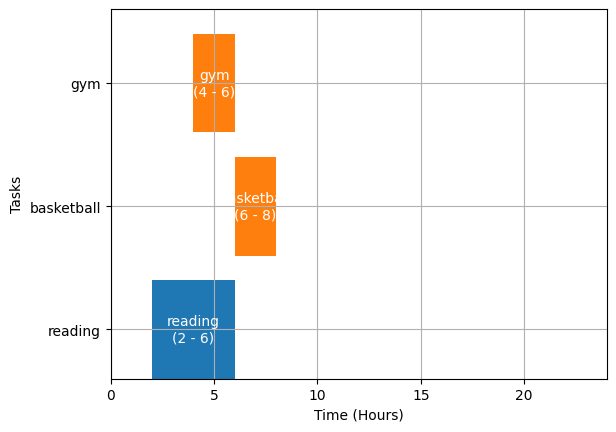

In [8]:
import matplotlib.pyplot as plt

# Task Class to represent each task with necessary attributes
class Task:
    def __init__(self, name, task_type, priority, duration, start_time=0):
        self.name = name  # Task name
        self.task_type = task_type  # 'academic' or 'personal'
        self.priority = priority  # Numeric priority for sorting
        self.duration = duration  # Duration in hours
        self.start_time = start_time  # Start time in hours (0-24 for simplicity)
        
    @property
    def end_time(self):
        """Calculate the end time based on start time and duration."""
        return min(self.start_time + self.duration, 24)  # Cap at 24 for a single day
    
    def __repr__(self):
        return f"{self.name} ({self.task_type}): Priority {self.priority}, Start {self.start_time}, End {self.end_time}"

# Input function to take task details from the user
def input_tasks():
    tasks = []
    while True:
        name = input("Enter task name: ")
        task_type = input("Enter task type (personal/academic): ")
        priority = int(input("Enter priority (1: high, 2: medium, 3: low): "))
        duration = int(input("Enter task duration (in hours): "))
        start_time = int(input("Enter task start time (0-24): "))

        task = Task(name, task_type, priority, duration, start_time)
        tasks.append(task)

        cont = input("Add another task? (yes/no): ")
        if cont.lower() != 'yes':
            break
    return tasks

# Merge Sort Algorithm to sort tasks by the specified key (e.g., priority or start time)
def merge_sort(tasks, key):
    if len(tasks) <= 1:
        return tasks

    mid = len(tasks) // 2
    left = merge_sort(tasks[:mid], key)
    right = merge_sort(tasks[mid:], key)
    
    return merge(left, right, key)

def merge(left, right, key):
    result = []
    while left and right:
        if getattr(left[0], key) <= getattr(right[0], key):
            result.append(left.pop(0))
        else:
            result.append(right.pop(0))
    return result + left + right

# Dynamic Programming Algorithm for Weighted Interval Scheduling
def weighted_interval_scheduling(tasks):
    tasks = merge_sort(tasks, 'end_time')  # Sort by end time for optimal scheduling
    n = len(tasks)
    OPT = [0] * (n + 1)  # DP table for storing optimal solutions

    # Precompute latest non-conflicting tasks
    p = [0] * n
    for j in range(n):
        p[j] = latest_non_conflicting(tasks, j)

    for j in range(1, n + 1):
        include = tasks[j-1].priority + OPT[p[j-1] + 1]
        exclude = OPT[j-1]
        OPT[j] = max(include, exclude)

    return OPT[n]  # Return the maximum priority scheduling

# Helper function to find the latest non-conflicting task using binary search
def latest_non_conflicting(tasks, j):
    for i in range(j - 1, -1, -1):
        if tasks[i].end_time <= tasks[j-1].start_time:  # Non-conflicting
            return i
    return -1

# Binary Search to quickly retrieve tasks based on deadline or start time
def binary_search(tasks, target_time):
    low, high = 0, len(tasks) - 1
    while low <= high:
        mid = (low + high) // 2
        if tasks[mid].end_time == target_time:
            return mid
        elif tasks[mid].end_time < target_time:
            low = mid + 1
        else:
            high = mid - 1
    return low  # Return the index of the next upcoming task

# Analyze busy time slots by counting task density within time intervals
def analyze_busy_slots(tasks):
    time_slots = [0] * 24  # Assuming a 24-hour day
    for task in tasks:
        for hour in range(task.start_time, min(task.start_time + task.duration, 24)):
            time_slots[hour] += 1
    return time_slots

# Gantt Chart to visualize the task schedule with labels for start and end times
def plot_gantt_chart(tasks):
    fig, gnt = plt.subplots()

    # Set chart limits and labels
    gnt.set_ylim(0, len(tasks) * 5)
    gnt.set_xlim(0, 24)  # Assuming a 24-hour schedule for simplicity
    gnt.set_xlabel('Time (Hours)')
    gnt.set_ylabel('Tasks')
    gnt.set_yticks([i * 5 + 2 for i in range(len(tasks))])
    gnt.set_yticklabels([task.name for task in tasks])  # Label y-axis with task names

    # Plot each task as a bar
    for i, task in enumerate(tasks):
        start = task.start_time
        duration = task.duration
        end = task.end_time
        color = 'tab:blue' if task.task_type == 'academic' else 'tab:orange'
        
        # Draw the task as a bar
        gnt.broken_barh([(start, duration)], (i * 5, 4), facecolors=color)
        
        # Add label showing start time and end time on the bar itself
        gnt.text(start + duration / 2, i * 5 + 2, f"{task.name}\n({start} - {end})", 
                 ha='center', va='center', color='white')

    gnt.grid(True)
    plt.show()

# Main function to run the scheduling assistant
def main():
    print("Welcome to the Personal Scheduling Assistant!")
    
    # Input tasks
    tasks = input_tasks()
    
    # Sort tasks by priority
    sorted_tasks = merge_sort(tasks, 'priority')
    print("Sorted tasks by priority:")
    for task in sorted_tasks:
        print(task)

    # Apply dynamic programming for optimal scheduling
    max_priority_schedule = weighted_interval_scheduling(sorted_tasks)
    print(f"Maximum priority achievable through optimal scheduling: {max_priority_schedule}")
    
    # Analyze busy slots
    busy_slots = analyze_busy_slots(sorted_tasks)
    print("Busy time slots (task density):", busy_slots)
    
    # Plot Gantt chart for task visualization
    plot_gantt_chart(sorted_tasks)

if __name__ == "__main__":
    main()

